<a href="https://colab.research.google.com/github/KalenGabel/semi_emp_model_eval/blob/main/BiWeekly_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Code**

## This notebook contains code that will set up and train a neural network on input data from a user.

### Notes on Colab:
* To run a cell hit ```shift + enter```
* To add a code cell, hit the ```+ Code``` button on the top left


In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_excel('Compressor Data.xlsx')
df.head()

,Capacity [Btu/hr],Power [W],Current [Amps],Mdot [lbs/hr],EER [Btu/Whr],eta_is [%],Tdis [F],Tcond [F],Tevap [F],Capacity [kW],...,Tsuc [K],Speed [RPM],Mdot [kg/s],Tevap [C],Tcond [C],SST [C],SDT [C],Pevap_norm,Pcond_norm,Tsuc_norm
0,11710,1495,6.57,150.5,7.83,61.7,204.5,100,10,3.431862,...,272.038889,3600,0.018963,-12.222222,37.777778,-12.222222,37.777778,0.100000,0.373752,0.100000
1,15111,1480,6.50,191.9,10.21,66.4,184.9,100,20,4.428597,...,277.594444,3600,0.024179,-6.666667,37.777778,-6.666667,37.777778,0.238075,0.373752,0.223077
2,18876,1457,6.40,236.6,12.96,70.2,171.4,100,30,5.532010,...,283.150000,3600,0.029811,-1.111111,37.777778,-1.111111,37.777778,0.397155,0.373752,0.346154
3,18655,2119,9.24,274.5,8.80,69.0,211.6,130,40,5.467241,...,288.705556,3600,0.034586,4.444444,54.444444,4.444444,54.444444,0.579227,0.748048,0.469231
4,20357,1855,8.09,281.7,10.97,71.9,192.4,120,40,5.966048,...,288.705556,3600,0.035494,4.444444,48.888889,4.444444,48.888889,0.579227,0.610521,0.469231


In [ ]:
df['Mdot [kg/hr]'] = np.around(df['Mdot [kg/hr]'].to_numpy(), decimals=1)

In [ ]:
df['Pevap [kPa]'] = df['Pevap [Pa]'] / 1000
df['Pcond [kPa]'] = df['Pcond [Pa]'] / 1000
df['Pevap [kPa]'] = np.around(df['Pevap [kPa]'].to_numpy(), decimals=1)
df['Pcond [kPa]'] = np.around(df['Pcond [kPa]'].to_numpy(), decimals=1)

In [ ]:
df['Tsuc [K]'] = np.around(df['Tsuc [K]'].to_numpy(), decimals=1)

# **Selecting Data from the data set**
## We need to define what our inputs and outputs will be.

### Here we use pandas to grab the columns of data we are interested in.

### Here we want inputs to be: 
* Evaporating Pressure: ```Pevap [kPa]```
* Condensing Pressure: ```Pcond [kPa]```
* Suction Temperature: ```Tsuc [K]```

### And the outputs to be:
* Power: ```Power [W]```
* Mass Flow Rate: ```Mdot [kg/hr]```

## In Machine Learning the inputs are called ```features``` and the outputs are called ```labels```



Note: we use the method ```to_numpy()``` to convert the dataframe series object into numpy arrays

In [ ]:
features = df[['Pevap [kPa]','Pcond [kPa]','Tsuc [K]']].to_numpy()
labels = df[['Power [W]','Mdot [kg/hr]']].to_numpy()

If importing the data file didn't work for you. Copy and paste the below code into a code cell to use as the feature and labels.

```  features = np.array([[ 530. , 2290.8,  272. ],
                          [ 641.6, 2290.8,  277.6],
                          [ 770.2, 2290.8,  283.2],
                          [ 917.4, 3389. ,  288.7],
                          [ 917.4, 2985.5,  288.7],
                          [ 917.4, 2620.5,  288.7],
                          [ 917.4, 2290.8,  288.7],
                          [ 917.4, 1993.7,  288.7],
                          [ 917.4, 1726.7,  288.7],
                          [ 998.5, 2620.5,  291.5]])```

``` labels = np.array([[1495., 68.3],
       [1480., 87. ],
       [1457., 107.3],
       [2119., 124.5],
       [1855., 127.8],
       [1630., 130. ],
       [1427., 131.7],
       [1252., 133.8],
       [1095., 135. ],
       [1611., 143.5]]) ```

In [ ]:
features = np.array([[ 530. , 2290.8, 272. ], [ 641.6, 2290.8, 277.6], [ 770.2, 2290.8, 283.2], [ 917.4, 3389. , 288.7], [ 917.4, 2985.5, 288.7], [ 917.4, 2620.5, 288.7], [ 917.4, 2290.8, 288.7], [ 917.4, 1993.7, 288.7], [ 917.4, 1726.7, 288.7], [ 998.5, 2620.5, 291.5]])

labels = np.array([[1495., 68.3], [1480., 87. ], [1457., 107.3], [2119., 124.5], [1855., 127.8], [1630., 130. ], [1427., 131.7], [1252., 133.8], [1095., 135. ], [1611., 143.5]])

In [ ]:
features.shape

(10, 3)

# **Imports**
We need to import the ```tensorflow``` package and a couple of items within it.

* Layers in ```tensorflow.keras```
* callbacks in ```tensorflow.keras.callbacks```

### Note: ```keras``` was the original machine learning package developed and used for python. Developers at Google incorporated it fully into ```tensorflow``` and built on it. 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# **Defining a model**
### We will used the ```Sequential``` model within ```keras```. It groups a linear stack of layers and runs them sequentially.

## The syntax for the model is:

```tf.keras.Sequential()```

## We set the model object equal to a model variable

```model = tf.keras.Sequential()```

## Once the variable is set, we can run methods such as:

* add
>```model.add()```

* compile
>```model.compile()```

* compute_loss
>```model.compute_loss()```

* compute_metrics
>```model.compute_metrics()```

* evaluate
>```model.evaluate()```

* fit
>```model.fit()```

* predict
>```model.predict()```

* summary
>```model.summary()```

* save
>```model.save()```





In [ ]:
model = tf.keras.Sequential()

# **Layers**
The layers method is how we add a layer of nodes to the neural network.
* The syntax ```model.add()``` is used to add layers

### For our model we will add one dense layer. Dense layers are fully connected meaning all inputs are passed to all nodes. Denses layer are accessed in ```layers``` using the syntax ```layers.Dense()```

* We pass the layer to the ```model.add()``` method
>```model.add(layer.Dense())```

* ```layer.Dense()``` takes inputs that define it such as: number of nodes and activation function

### Since we have 3 inputs: ```[Pevap, Pcond, Tsuc]```in the first layer we must define the input shape. The rest of the layers input shapes will be defined for us by ```tensorflow```.

Lets our first layer to have:
* 8 nodes
* rectified linear as the activation function. 

```model.add(layer.Dense(8,input_shape=(3,),activation='relu')```

### The last layer must have no activation function and the same number of nodes as outputs we are after. In our case: ```[power,mdot]```. Therefore we need 2 nodes.

* Last layer needs 2 nodes

>```model.add(layer.Dense(2))```

## Now we have a our model initialized and layers added



In [ ]:
model.add(layers.Dense(8,input_shape=(3,),activation='relu'))
model.add(layers.Dense(16,activation='relu'))
# model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(2))

# **Compiling a model**
```
model.compile()
```
### *Pick an Optimizer:* 
```
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.01),
              )
```
1.   Adam
> ```optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)```
2.   Adagrad
> ```optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.01)```
3.   SGD (Stochastic Gradient Decent)
> ```optimizer=tf.keras.optimizers.SGD(learning_rate=0.01)```
4.   Adamax
> ```optimizer=tf.keras.optimizers.Adamax(learning_rate=0.01)```

### *Pick a loss metric to monitor*
```
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.01),
              loss='mean_absolute_percentage_error',
              )
```
1.   MAPE (Mean Absolute Percent Error)
> ``` loss='mean_absolute_percentage_error'```
2.   MSE  (Mean Squared Error)
> ``` loss='mean_squared_error'```
3.   MAE  (Mean Absolute Error)
> ``` loss='mean_absolute_error'```

## Now we have our model compiled with an optimizer and loss metric selected




In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007),
              loss='mean_absolute_percentage_error'
             )

# **Fit the model:**
```
model.fit()
```
## Feed in the:

1. training data
2. training time
3. validation split
4. callbacks

### The ```model.fit()``` call returns an object that has the loss values recorded for each step. We can set this equal to a variable; ```history```
```
history = model.fit()
```

## Training Data
>```history = model.fit(train_features,train_labels)```

## Training Time
* These are called 'epochs' and one epoch is complete after the optimizer calculated the loss and back propagated the error through the weights and biases.
* The next epoch will use the weights and biases from the previous optimizer step, calculate the next loss,change the weights and biases again. 

>```
history = model.fit(train_features,train_labels,
                    epochs=1500)
```

## Validation Split
* The validation split will select what percent of the training data will be used to calculate the validation loss.
* These data points are not included in while the model is fitting and are used to make track how well the model is performing at data points it hasn't seen.
* In our case we tell tensorflow to use 20% of the data as our validation set, or two data points.

>```
history = model.fit(train_features,train_labels,
                    epochs=1500,
                    validation_split=0.2)
```

## Callbacks
* We set ```callbacks``` to monitor the model while its training and if a certain condition is met stop the training. 
* We set a callback to monitor our validation loss.

```
early_stopping = EarlyStopping(monitor ='val_loss',
                               patience = 500)
```

>1.   If our validation loss is increasing while the loss is decreasing, we know we are overfitting.
>2.   Ideally our loss and validation loss will both be decreasing. In that case we know our model is training to the data well and "generalizing" well to data it hasn't seen.

```
history = model.fit(train_features,train_labels,
                    epochs=1500,
                    verbose=0,
                    validation_split=0.2,
                    callbacks = [early_stopping]
                   )
```

## Now we have the features and labels entered and our callbacks and training time set. It's time to fit the model

In [ ]:
early_stopping = EarlyStopping(monitor ='val_loss',
                               patience = 500)

In [ ]:
history = model.fit(features,labels,
                    epochs=2500,
                    verbose=0,
                    validation_split=0.2,
                    callbacks = [early_stopping]
                    )

# **Plotting the loss vs epochs to see how well the model trained**

## When evaluating how the model did, remember you can go change any of the following hyperparameters to see if they generate better results for your data.
* Number of nodes in a hidden layer: ```layer.Dense(20,activation='relu')```
* Number of hidden layers:

>1.   ``` layer.Dense(20,activation='relu') ```
>2.   ``` layer.Dense(20,activation='relu') ```
>3.   ``` layer.Dense(20,activation='relu') ```

* Optimizer: ```Adam```,```Adagrad```,```SGD```,```Adamax``` etc.

* Loss Metric: ```mape```,```mae```,```mse``` etc.

* Training Time: ```epochs=10000```

* Learning Rate: ```tf.kera.optimizers.Adam(learning_rate=0.1)```

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

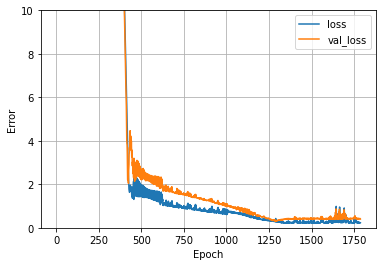

In [ ]:
plot_loss(history)

# **Using the model to predict data**

## After fitting the model to our data, we can use ```model.predict() ``` to see the results our model is producing. 

``` model.predict(features)```

## Note: we have to give our model inputs to predict the outputs, in this case we just run it with the training data.



In [ ]:
test_predictions = model.predict(features)
test_predictions

array([[1495.7269 ,   68.61523],
       [1477.8643 ,   86.89652],
       [1456.6301 ,  107.9755 ],
       [2099.4424 ,  125.19866],
       [1854.0756 ,  127.74057],
       [1632.1206 ,  130.03998],
       [1431.6313 ,  132.11696],
       [1250.9661 ,  133.9886 ],
       [1088.6045 ,  135.67061],
       [1618.172  ,  143.34422]], dtype=float32)

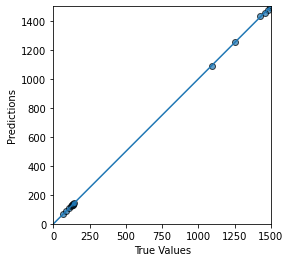

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(labels, test_predictions, edgecolor='black',alpha=0.7)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1500]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

# **Plotting the results for Mass Flow Rate individually**

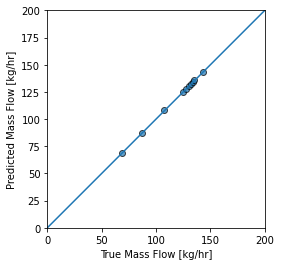

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(labels[:,1], test_predictions[:,1], edgecolor='black',alpha=0.7)
plt.xlabel('True Mass Flow [kg/hr]')
plt.ylabel('Predicted Mass Flow [kg/hr]')
lims = [0, 200]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

# **Plotting the results for Power individually**

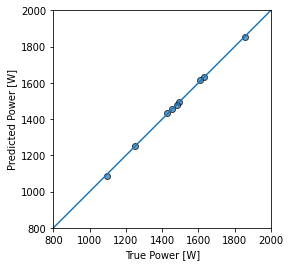

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(labels[:,0], test_predictions[:,0], edgecolor='black',alpha=0.7)
plt.xlabel('True Power [W]')
plt.ylabel('Predicted Power [W]')
lims = [800, 2000]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

In [ ]:
# model.save('Appr2-Scroll-ANN-8x1_MSE_09.27.21')

In [ ]:
model.evaluate(features,labels)

1/1 [==============================] - 0s 29ms/step - loss: 0.2834


0.2834450602531433

In [ ]:
from sklearn.metrics import mean_absolute_error, max_error

In [ ]:
mae = mean_absolute_error(labels,test_predictions)
mae

2.4196107482910154

In [ ]:
me = max_error(labels[0],test_predictions[0])
me

0.7269287109375

In [ ]:
me = max_error(labels[1],test_predictions[1])
me

2.1357421875